El conjunto de datos para esta competencia https://www.kaggle.com/competitions/playground-series-s3e14 (tanto el de entrenamiento como el de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el Conjunto de Datos de Predicción de Rendimiento de Arándanos Silvestres https://data.mendeley.com/datasets/p5hvjzsvn8/1 O https://www.kaggle.com/datasets/shashwatwork/wild-blueberry-yield-prediction-dataset.

Contexto
Los arándanos son plantas perennes con flores y bayas de color azul o morado. Se clasifican en la sección Cyanococcus dentro del género Vaccinium. Vaccinium también incluye arándanos rojos, arándanos agrios, moras de los pantanos y arándanos de Madeira. Los arándanos comerciales, tanto silvestres (de arbusto bajo) como cultivados (de arbusto alto), son nativos de América del Norte. Las variedades de arbusto alto fueron introducidas en Europa durante la década de 1930.

Los arándanos suelen ser arbustos rastreros que pueden variar en tamaño desde 10 centímetros (4 pulgadas) hasta 4 metros (13 pies) de altura. En la producción comercial de arándanos, las especies con bayas pequeñas, del tamaño de un guisante que crecen en arbustos de bajo nivel se conocen como "arándanos de arbusto bajo" (sinónimo de "silvestres"), mientras que las especies con bayas más grandes que crecen en arbustos más altos y cultivados se conocen como "arándanos de arbusto alto". Canadá es el principal productor de arándanos de arbusto bajo, mientras que Estados Unidos produce aproximadamente el 40% del suministro mundial de arándanos de arbusto alto. https://www.sciencedirect.com/science/article/abs/pii/S016816992031156X?via%3Dihub

Contenido
"El conjunto de datos utilizado para el modelado predictivo fue generado por el Modelo de Simulación de Polinización de Arándanos Silvestres, que es un programa de simulación por computadora de código abierto y explícitamente espacial que permite explorar cómo diversos factores, incluida la disposición espacial de las plantas, la polinización cruzada y autopolinización, las composiciones de especies de abejas y las condiciones meteorológicas, aisladamente y en combinación, afectan la eficiencia de la polinización y el rendimiento del agroecosistema de arándanos silvestres. El modelo de simulación ha sido validado mediante la observación de campo y los datos experimentales recopilados en Maine, EE. UU. y en las Marítimas canadienses durante los últimos 30 años y ahora es una herramienta útil para la prueba de hipótesis y el desarrollo de teorías para las investigaciones de polinización de arándanos silvestres." https://www.sciencedirect.com/science/article/abs/pii/S016816992031156X?via%3Dihub

* Descripción de las Características
* Clonesize m2 - El tamaño promedio del clon de arándano en el campo
* Honeybee abejas/m2/min - Densidad de abejas melíferas en el campo
* Bumbles abejas/m2/min - Densidad de abejorros en el campo
* Andrena abejas/m2/min - Densidad de abejas Andrena en el campo
* Osmia abejas/m2/min - Densidad de abejas Osmia en el campo
* MaxOfUpperTRange ℃ - El registro más alto de la temperatura diaria del aire en la banda superior durante la temporada de floración
* MinOfUpperTRange ℃ - El registro más bajo de la temperatura diaria del aire en la banda superior
* AverageOfUpperTRange ℃ - El promedio de la temperatura diaria del aire en la banda superior
* MaxOfLowerTRange ℃ - El registro más alto de la temperatura diaria del aire en la banda inferior durante la temporada de floración
* MinOfLowerTRange ℃ - El registro más bajo de la temperatura diaria del aire en la banda inferior
* AverageOfLowerTRange ℃ - El promedio de la temperatura diaria del aire en la banda inferior
* RainingDays Day - El número total de días durante la temporada de floración, cada uno de los cuales tiene precipitaciones mayores a cero
* AverageRainingDays Day - El promedio de días lluviosos de toda la temporada de floración
* Fruitset
* Fruitmass
* Seeds

Target

*Yield - Kilogramos por hectarea Kg/HA

In [46]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.gridspec import GridSpec
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
def descomprimir_y_cargar_csv(archivo_zip, directorio_destino='.'):
    dataframes = {}

    with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
        zip_ref.extractall(directorio_destino)

        for nombre_archivo in zip_ref.namelist():
            if nombre_archivo.endswith('.csv'):
                nombre_variable = os.path.splitext(os.path.basename(nombre_archivo))[0]
                ruta_archivo = os.path.join(directorio_destino, nombre_archivo)
                dataframes[nombre_variable] = pd.read_csv(ruta_archivo)
    
    return dataframes


In [3]:
archivo_zip = 'playground-series-s3e14.zip'
dataframes = descomprimir_y_cargar_csv(archivo_zip)
print(dataframes.keys())


dict_keys(['sample_submission', 'test', 'train'])


In [4]:
df_train= dataframes['train']
print("El dataset train tiene: {} filas y {} columnas".format(df_train.shape[0], df_train.shape[1]))
df_head_train = df_train.head()
df_describe_train = df_train.describe()
print(df_head_train, "\n")
print(df_describe_train)

El dataset train tiene: 15289 filas y 18 columnas
   id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange 

In [5]:
df_test= dataframes['test']
print("El dataset test tiene: {} filas y {} columnas".format(df_test.shape[0], df_test.shape[1]))
df_head_test = df_test.head()
df_describe_test = df_test.describe()
print(df_head_test, "\n")
print(df_describe_test)

El dataset test tiene: 10194 filas y 17 columnas
      id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0  15289       25.0      0.25     0.25     0.25   0.25              86.0   
1  15290       12.5      0.25     0.25     0.75   0.63              94.6   
2  15291       12.5      0.25     0.25     0.63   0.63              86.0   
3  15292       25.0      0.50     0.38     0.38   0.63              86.0   
4  15293       37.5      0.75     0.25     0.25   0.25              94.6   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              52.0                  71.9              62.0              30.0   
1              57.2                  79.0              68.2              33.0   
2              52.0                  71.9              62.0              30.0   
3              52.0                  71.9              62.0              30.0   
4              57.2                  79.0              68.2              33.0   

   Aver

In [6]:
print(df_train.dtypes,'\n')
valores_nulos_train = df_train.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(valores_nulos_train)
total_valores_nulos_train = valores_nulos_train.sum()
if total_valores_nulos_train > 0:
    print(f"Total de valores nulos en el DataFrame: {total_valores_nulos_train}")
else:
    print("No existen valores nulos en el DataFrame.")
    
    

id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object 

Cantidad de valores nulos por columna:
id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruit

In [7]:
print(df_test.dtypes,'\n')
valores_nulos_test = df_test.isnull().sum()
print("Cantidad de valores nulos por columna:")
print(valores_nulos_test)
total_valores_nulos_test = valores_nulos_test.sum()
if total_valores_nulos_test > 0:
    print(f"Total de valores nulos en el DataFrame: {total_valores_nulos_test}")
else:
    print("No existen valores nulos en el DataFrame.")

id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
dtype: object 

Cantidad de valores nulos por columna:
id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass  

In [8]:
def calcular_varianza(dataframe):
    varianza = dataframe.var()
    varianza = varianza.apply(lambda x: format(x, '.10f'))
    return varianza

varianzas = calcular_varianza(df_train)
print(varianzas)
varianzas = calcular_varianza(df_test)
print(varianzas)

id                      19480734.1666666679
clonesize                     43.4968062371
honeybee                       0.1307857308
bumbles                        0.0035900360
andrena                        0.0219380587
osmia                          0.0194571891
MaxOfUpperTRange              83.6621674453
MinOfUpperTRange              30.7626082856
AverageOfUpperTRange          58.3972216183
MaxOfLowerTRange              43.7005560460
MinOfLowerTRange              10.2103675902
AverageOfLowerTRange          29.0579781339
RainingDays                  135.8992221984
AverageRainingDays             0.0268647861
fruitset                       0.0055338127
fruitmass                      0.0013716129
seeds                         16.2496593182
yield                    1787721.0195849969
dtype: object
id                      8660652.5000000000
clonesize                    43.4526727643
honeybee                      0.1521173463
bumbles                       0.0035840036
andrena               

El conjunto de datos entregados para la compentencia/estudio cuenta con 3 datos tabulares dict_keys(['sample_submission', 'test', 'train']), donde se tiene dividido el test.csv y el train.csv en dos sets de datos tabulares, sample_submission es un ejemplo de como entregar el test.csv a Kaggle por lo que no se tomara en cuenta para realizar el EDA, tambien hay que tomar en consideracion que solamente train.csv tiene la caracteristica yield entre sus features.

### Histograma y Scatterplot

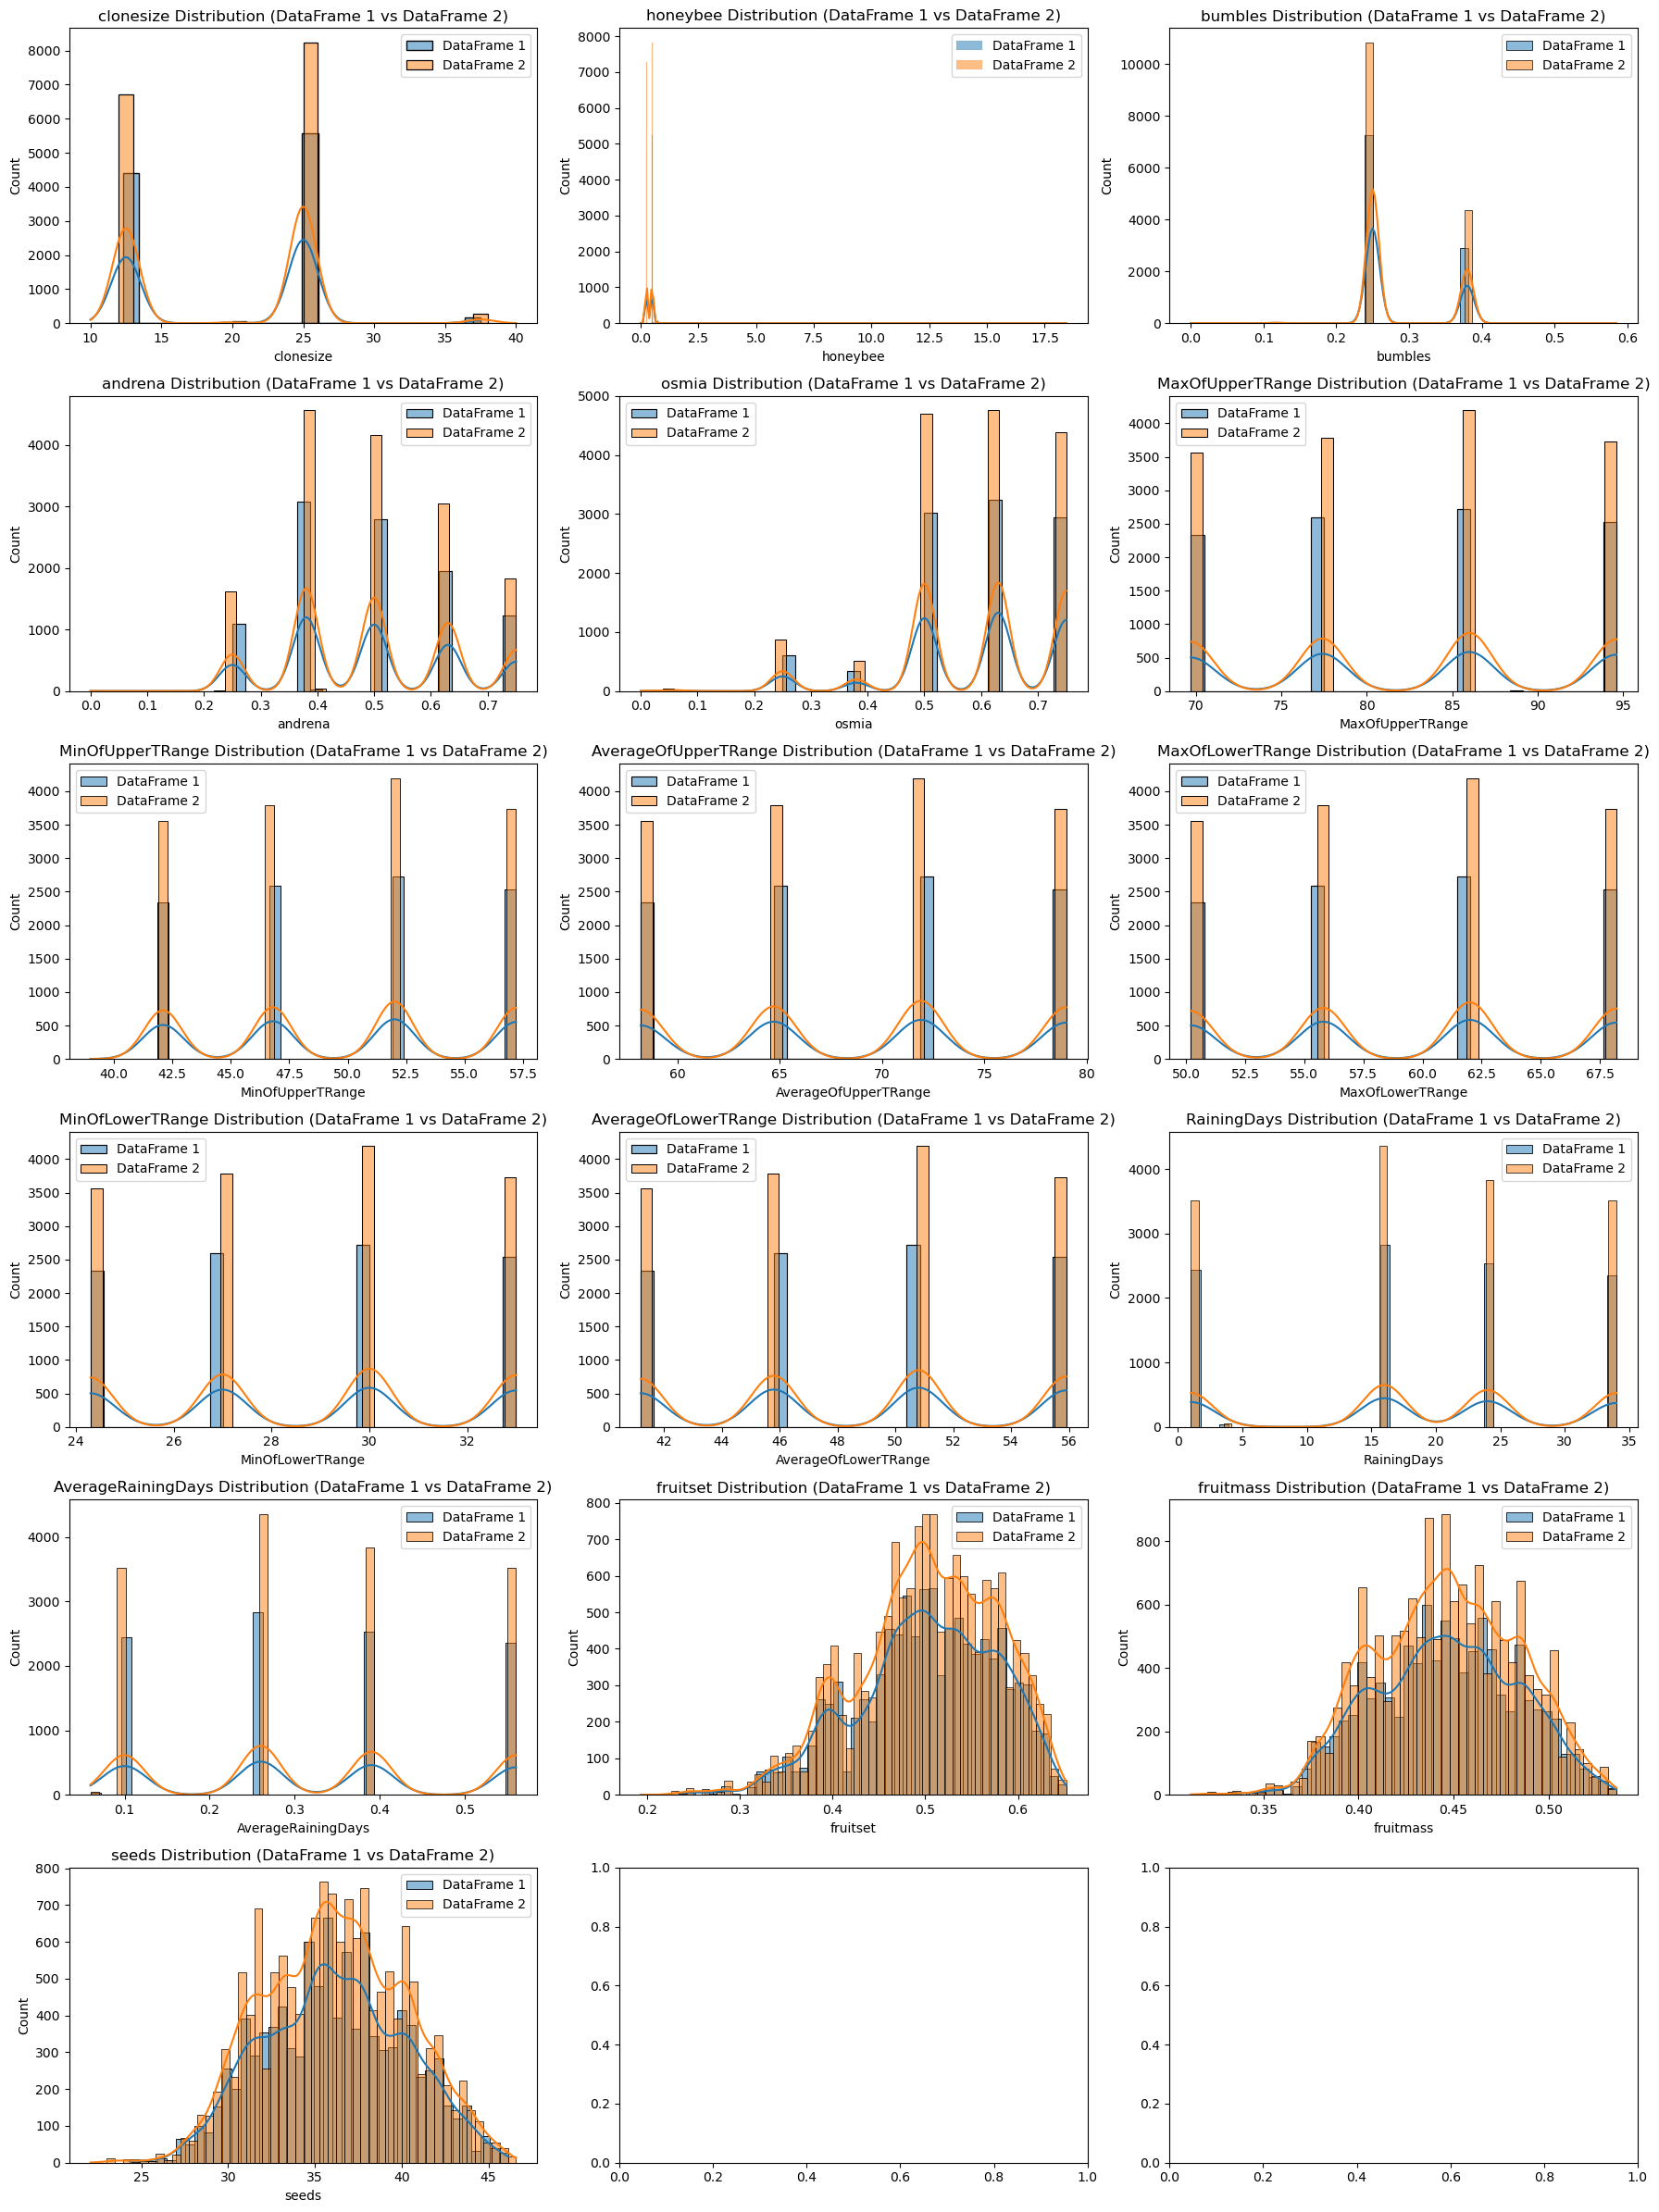

In [9]:
df_test=df_test.drop(['id'], axis=1)
df_train=df_train.drop(['id'], axis=1)
def comparar_histogramas(df1, df2, n_cols=3):
    n_rows = (len(df1.columns)) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df1.columns):
        ax = axes[i]
        sns.histplot(df1[var_name], kde=True, ax=ax, label='DataFrame 1', alpha=0.5)
        sns.histplot(df2[var_name], kde=True, ax=ax, label='DataFrame 2', alpha=0.5)
        ax.set_title(f'{var_name} Distribution (DataFrame 1 vs DataFrame 2)')
        ax.legend()

    plt.tight_layout()
    plt.show()

comparar_histogramas(df_test, df_train)

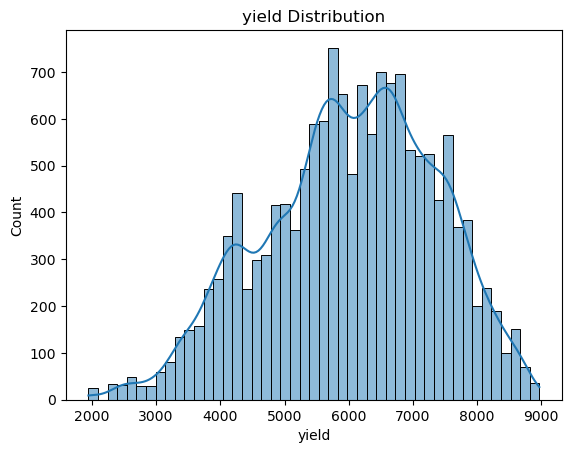

In [10]:
target_col = 'yield'
sns.histplot(df_train[target_col], kde=True)
plt.title(f'{target_col} Distribution')
plt.show()

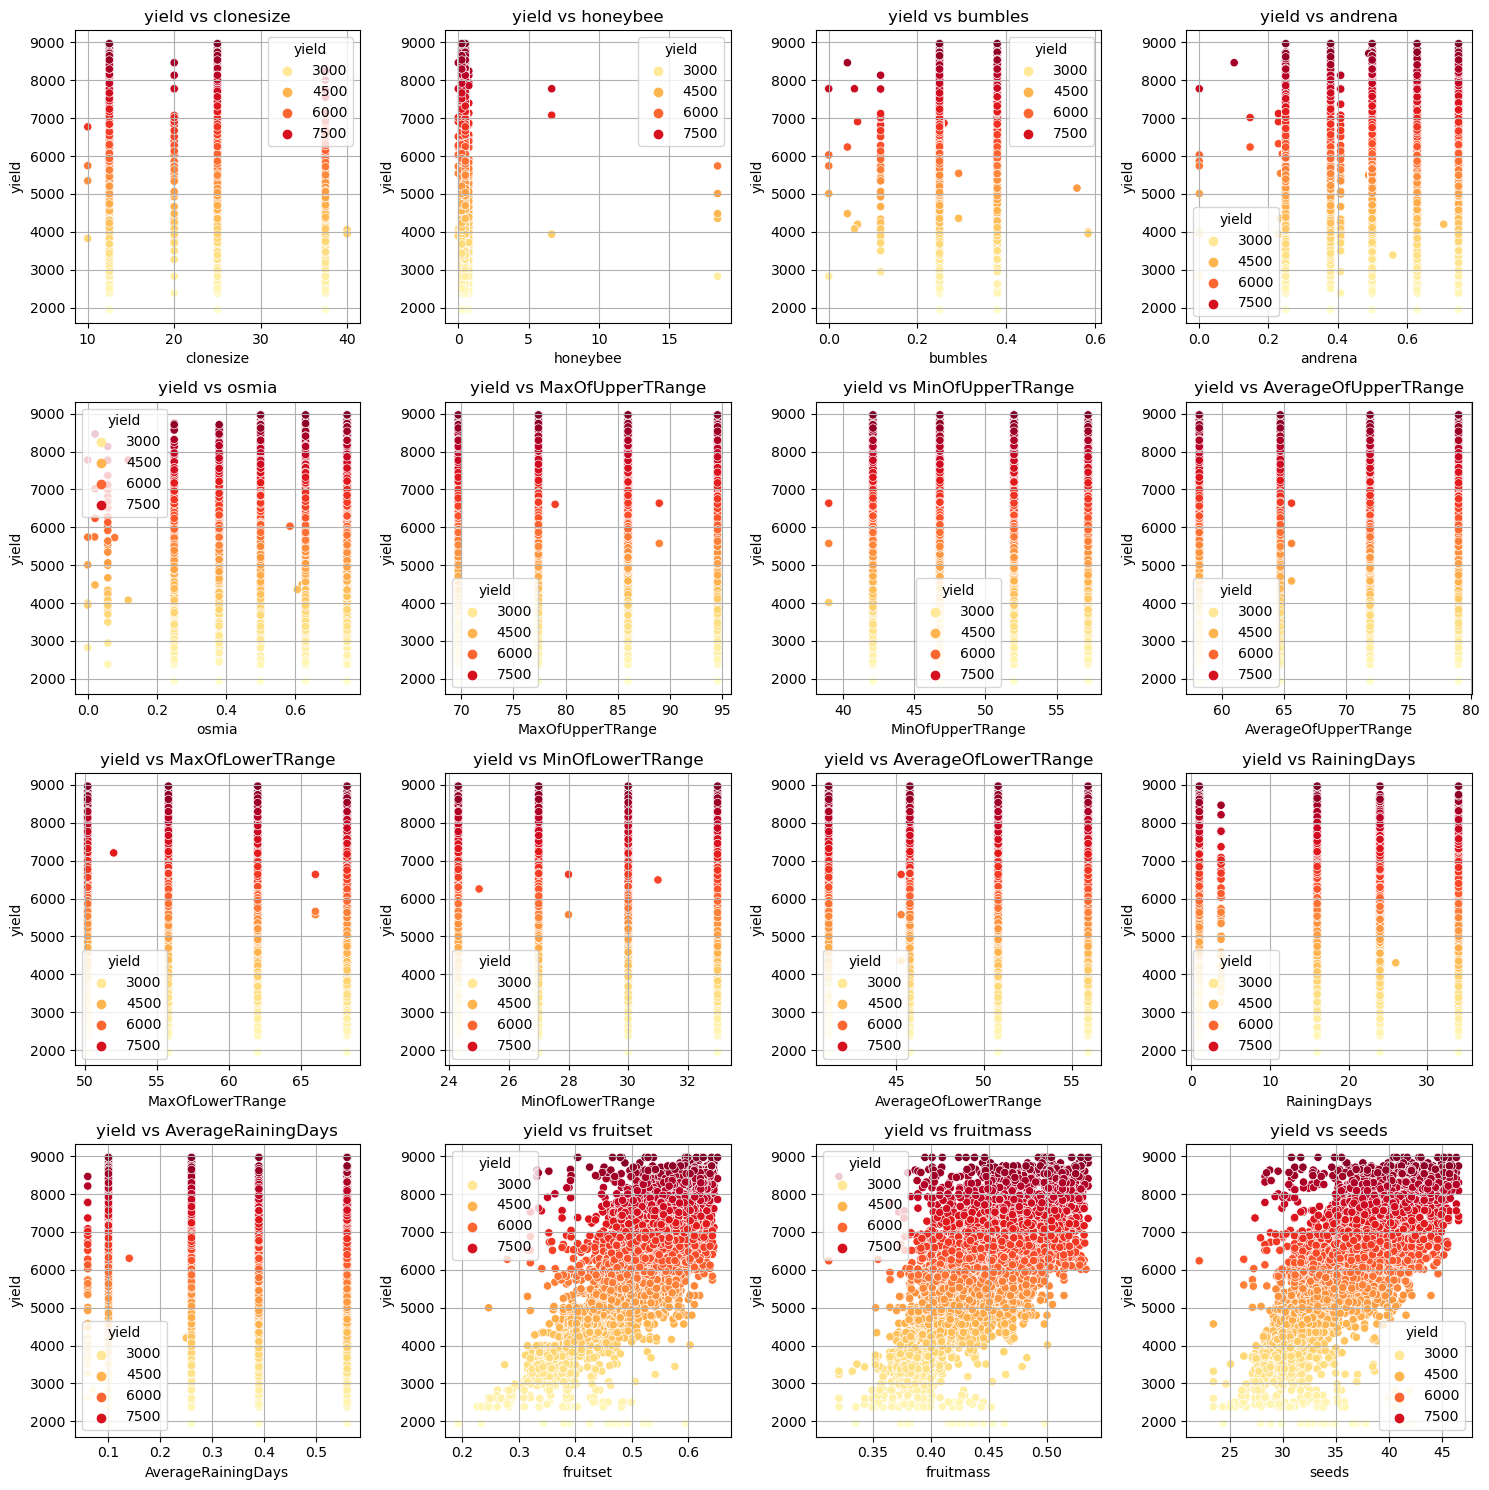

In [11]:
def scatter_plots_yield_vs_features(df, target_col='yield'):
    features = [col for col in df.columns if col != target_col]
    n_cols = 4
    n_rows = (len(features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        sns.scatterplot(data=df, x=feature, y=target_col, hue=target_col, palette='YlOrRd', ax=ax)
        ax.grid(True)
        ax.set_title(f'{target_col} vs {feature}')

    plt.tight_layout()
    plt.show()
    
scatter_plots_yield_vs_features(df_train, target_col='yield')

### Jointplot

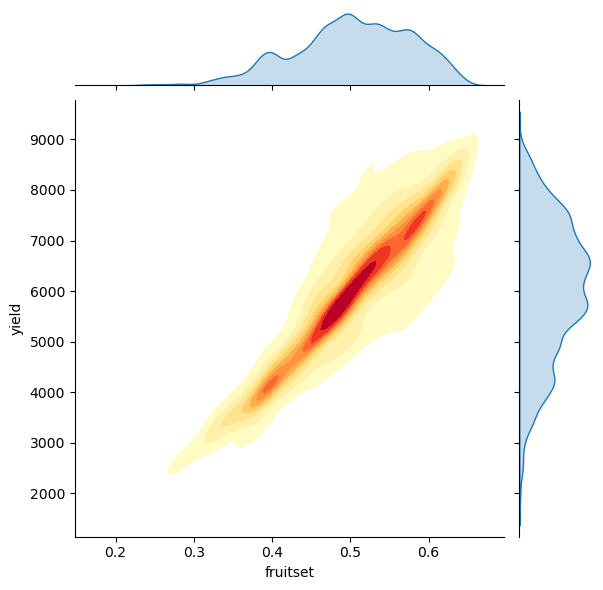

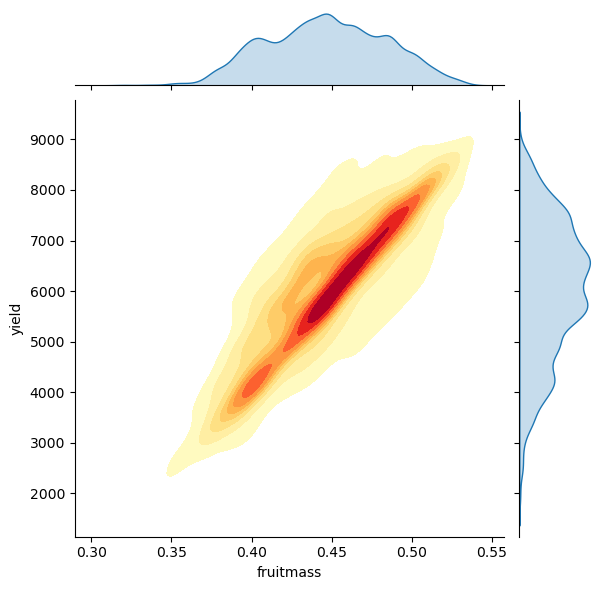

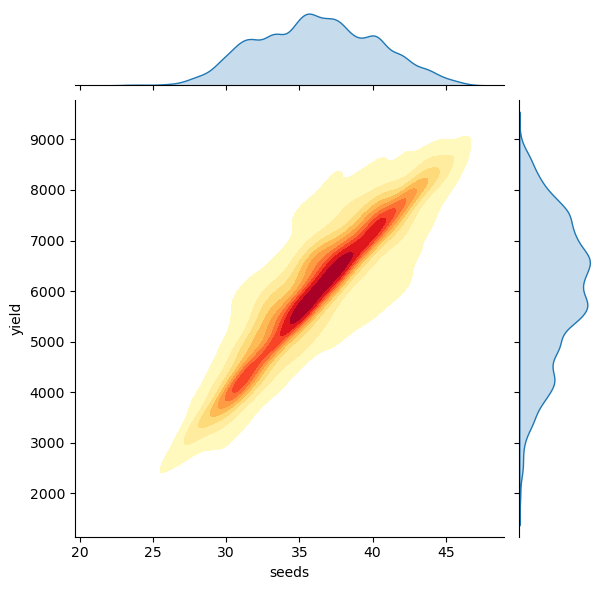

In [12]:
def plot_jointplot(df, y_col, columns, kinds):
    for column in columns:
        sns.jointplot(data=df, x=column, y=y_col, kind=kinds, cmap='YlOrRd', fill=True)
        plt.xlabel(column)
        plt.ylabel(y_col)
        plt.show()

columnas = df_train.iloc[:, -4:-1].columns
plot_jointplot(df_train, 'yield', columnas, 'kde')


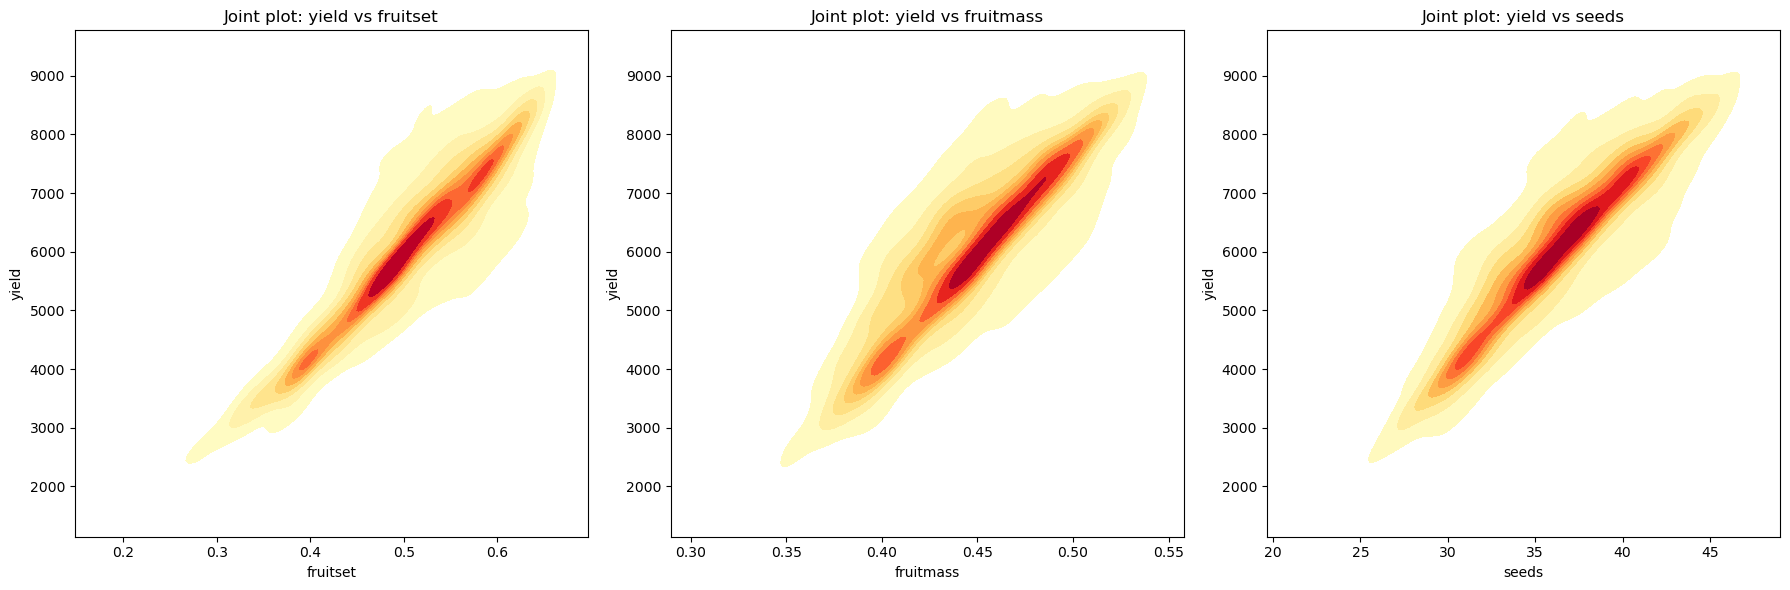

In [13]:
def plot_jointplot(df, y_col, columns):
    n_columns = len(columns)
    fig = plt.figure(figsize=(6 * n_columns, 6))
    grid = GridSpec(1, n_columns, figure=fig)
    
    for i, column in enumerate(columns):
        ax_joint = fig.add_subplot(grid[0, i])
        ax_marg_x = fig.add_subplot(grid[0, i], sharex=ax_joint)
        ax_marg_y = fig.add_subplot(grid[0, i], sharey=ax_joint)
        sns.kdeplot(data=df, x=column, y=y_col, ax=ax_joint, cmap='YlOrRd', fill=True)
        ax_joint.set_title(f'Joint plot: {y_col} vs {column}')
        ax_marg_x.set_axis_off()
        ax_marg_y.set_axis_off()

    plt.tight_layout()
    plt.show()
    
columnas = df_train.iloc[:, -4:-1].columns
plot_jointplot(df_train, 'yield', columnas)

### Correlacion de features

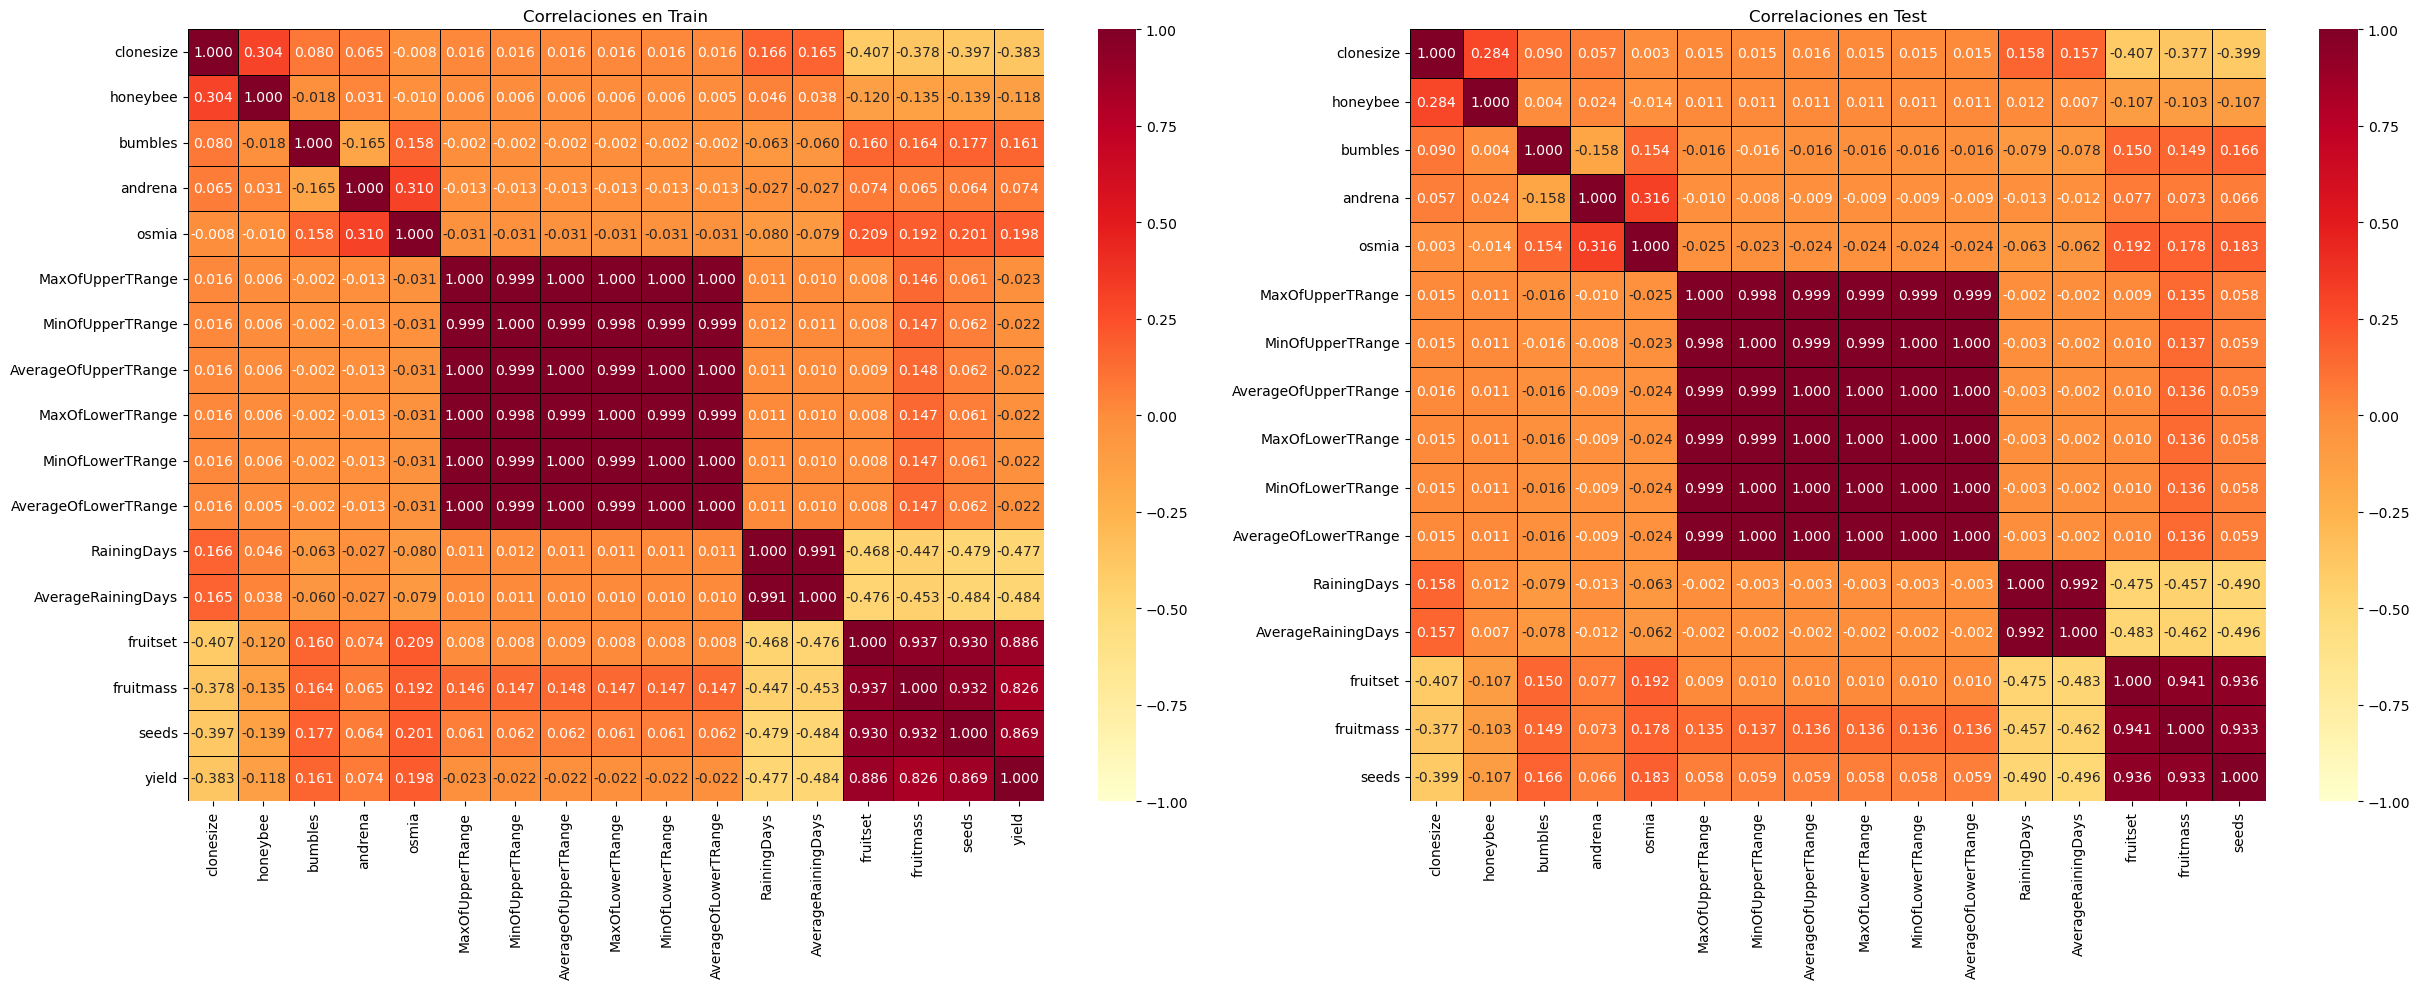

In [14]:
def graficar_correlaciones(df1, df2):
    corr1 = df1.corr()
    corr2 = df2.corr()

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

    sns.heatmap(corr1, annot=True, cmap='YlOrRd', vmin=-1, vmax=1, ax=ax1, fmt='.3f', linewidths=0.5, linecolor="black")
    ax1.set_title('Correlaciones en Train')

    sns.heatmap(corr2, annot=True, cmap='YlOrRd', vmin=-1, vmax=1, ax=ax2, fmt='.3f', linewidths=0.5, linecolor="black")
    ax2.set_title('Correlaciones en Test')

    plt.tight_layout()
    plt.show()
    
graficar_correlaciones(df_train, df_test)

### Estandarizar y normalizar los dataframes (Preparando los DF)

In [15]:
def standardize_and_normalize(df):
    scaler_std = StandardScaler()
    df_standardized = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)

    scaler_norm = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler_norm.fit_transform(df), columns=df.columns)

    return df_standardized, df_normalized, scaler_std, scaler_norm

df_train_std, df_train_norm, scaler_std_train, scaler_norm_train = standardize_and_normalize(df_train)
df_test_std, df_test_norm, scaler_std_test, scaler_norm_test = standardize_and_normalize(df_test)

In [16]:
df_train_std.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0.802929,0.306073,-0.613664,1.737386,-0.662120,-1.363365,-1.365484,-1.368341,-1.365954,-1.364693,-1.366975,0.458012,0.401611,-1.044938,-0.783260,-0.918905,-1.158091
1,0.802929,0.306073,-0.613664,0.049454,-0.662120,-1.363365,-1.365484,-1.368341,-1.365954,-1.364693,-1.366975,0.458012,0.401611,-0.777454,-0.661588,-0.572230,-0.356819
2,-1.092448,-0.385238,-0.613664,0.927179,0.269883,0.418756,0.419514,0.424487,0.419105,0.419198,0.413979,0.458012,0.401611,0.674659,0.656157,0.540029,0.631694
3,-1.092448,-0.385238,-0.613664,0.927179,-0.662120,-0.521504,-0.518061,-0.517729,-0.518808,-0.519692,-0.513601,0.458012,0.401611,0.850087,0.852832,0.819312,0.639920
4,0.802929,0.306073,-0.613664,0.927179,0.269883,-0.521504,-0.518061,-0.517729,-0.518808,-0.519692,-0.513601,0.458012,0.401611,1.034261,1.285628,1.071598,1.088052


### Regresion lineal, RIDGE, LASSO y K-Fold cross validation 

In [17]:
X = df_train_std.drop('yield', axis=1)
y = df_train_std['yield']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)
print("Instancias X_train dataset: ", X_train.shape)
print("Instancias y_train dataset: ", y_train.shape)
print("Instancias X_test dataset: ", X_test.shape)
print("Instancias y_test dataset: ", y_test.shape,'\n')


Shape of X: (15289, 16)
Shape of y: (15289,)
Instancias X_train dataset:  (10702, 16)
Instancias y_train dataset:  (10702,)
Instancias X_test dataset:  (4587, 16)
Instancias y_test dataset:  (4587,) 



In [18]:
def create_linear_regression_model(X_train, y_train, cv=5):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    scores = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)

    print(f"Mean RMSE de {cv}-Fold Cross Validation: {avg_rmse}")

    return lr_model

linear_model_1 = create_linear_regression_model(X_train, y_train, cv=10)

Mean RMSE de 10-Fold Cross Validation: 0.49078029401184053


In [19]:
def create_regression_models(X_train, y_train, alpha_ridge=1.0, alpha_lasso=1.0, cv=5):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    ridge_model = Ridge(alpha=alpha_ridge)
    ridge_model.fit(X_train, y_train)

    lasso_model = Lasso(alpha=alpha_lasso)
    lasso_model.fit(X_train, y_train)

    for model_name, model in [('Linear Regression', lr_model), ('Ridge', ridge_model), ('Lasso', lasso_model)]:
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        avg_rmse = np.mean(rmse_scores)
        print(f"{model_name} Mean RMSE de {cv}-Fold Cross Validation: {avg_rmse}")

    return lr_model, ridge_model, lasso_model

linear_model_2, ridge_model, lasso_model = create_regression_models(X_train, y_train, alpha_ridge=1.0, alpha_lasso=1.0, cv=10)

Linear Regression Mean RMSE de 10-Fold Cross Validation: 0.49078029401184053
Ridge Mean RMSE de 10-Fold Cross Validation: 0.4429933676568867
Lasso Mean RMSE de 10-Fold Cross Validation: 0.9978260887503512


In [20]:
y_pred = linear_model_1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82


In [21]:
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'R^2': r2}

metrics = calculate_metrics(linear_model_1, X_test, y_test)
print(f"Mean Squared Error: {metrics['MSE']:.2f}")
print(f"Root Mean Squared Error: {metrics['RMSE']:.2f}")
print(f"R^2: {metrics['R^2']:.2f}")

Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82


In [22]:
models = {
    'Linear Regression 1': linear_model_1,
    'Linear Regression 2': linear_model_2,  
    'Ridge': ridge_model,
    'Lasso': lasso_model    
}
print('Modelos entrenados: ', models.keys(), '\n')
   
for model_name, model in models.items():
    print(f"Modelo: {model_name}")
    metrics = calculate_metrics(model, X_test, y_test)
    print(f"Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"Root Mean Squared Error: {metrics['RMSE']:.2f}")
    print(f"R^2: {metrics['R^2']:.2f}")
    print()  

Modelos entrenados:  dict_keys(['Linear Regression 1', 'Linear Regression 2', 'Ridge', 'Lasso']) 

Modelo: Linear Regression 1
Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82

Modelo: Linear Regression 2
Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82

Modelo: Ridge
Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82

Modelo: Lasso
Mean Squared Error: 1.01
Root Mean Squared Error: 1.00
R^2: -0.00



Linear Regression 1, así como Linear Regression 2, Ridge & Lasso no son buenos modelos para la predicción de producción de kilogramos de arándanos por hectarea ['yield']

In [23]:
print(models.keys())
dict_reg_1 = models['Linear Regression 1']

dict_keys(['Linear Regression 1', 'Linear Regression 2', 'Ridge', 'Lasso'])


El df_test no contiene el target 'yield' por lo que son regresiones sobre data a la cual no se le peden aplicar metricas

In [24]:
y_pred_df_test_std = dict_reg_1.predict(df_test_std)
y_pred_desescalado = y_pred_df_test_std * scaler_std_test.scale_[-1] + scaler_std_test.mean_[-1]
print(f"Predicciones del modelo sobre el dataset test:", '\n')
print(f"Predicciones del modelo {dict_reg_1}: {y_pred_desescalado}")


Predicciones del modelo sobre el dataset test: 

Predicciones del modelo LinearRegression(): [30.9924604  36.36360555 39.82770031 ... 38.92320476 31.42114493
 40.05773678]


Quadratic and Cubic Features: Estos técnicas se utilizaran para capturar relaciones no lineales en el modelo de regresión.

In [25]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=1010)
models_poly = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0)
}

for name, model in models_poly.items():
    model.fit(X_train_poly, y_train_poly)
    y_pred_poly = model.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)
    r2_poly = r2_score(y_test_poly, y_pred_poly)
    print(f"{name} Model:")
    print(f"Mean Squared Error: {mse_poly:.2f}")
    print(f"Root Mean Squared Error: {rmse_poly:.2f}")
    print(f"R^2: {r2_poly:.2f}\n")

Linear Model:
Mean Squared Error: 355823784641.25
Root Mean Squared Error: 596509.67
R^2: -352598903647.44

Ridge Model:
Mean Squared Error: 1.40
Root Mean Squared Error: 1.18
R^2: -0.38

Lasso Model:
Mean Squared Error: 0.59
Root Mean Squared Error: 0.77
R^2: 0.42



In [26]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=1010)
models_poly = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0)
}

for name, model in models_poly.items():
    model.fit(X_train_poly, y_train_poly)
    y_pred_poly = model.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)
    r2_poly = r2_score(y_test_poly, y_pred_poly)
    print(f"{name} Model:")
    print(f"Mean Squared Error: {mse_poly:.2f}")
    print(f"Root Mean Squared Error: {rmse_poly:.2f}")
    print(f"R^2: {r2_poly:.2f}\n")


Linear Model:
Mean Squared Error: 862496557629112704.00
Root Mean Squared Error: 928706927.74
R^2: -854679630051140480.00

Ridge Model:
Mean Squared Error: 0.17
Root Mean Squared Error: 0.42
R^2: 0.83

Lasso Model:
Mean Squared Error: 1.01
Root Mean Squared Error: 1.00
R^2: -0.00



El mejor R^2 es del modelo Quadratic Ridge model con un valor de 0.83

In [27]:
poly = PolynomialFeatures(degree=1, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=1010)
models_poly = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0)
}

for name, model in models_poly.items():
    model.fit(X_train_poly, y_train_poly)
    y_pred_poly = model.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)
    r2_poly = r2_score(y_test_poly, y_pred_poly)
    print(f"{name} Model:")
    print(f"Mean Squared Error: {mse_poly:.2f}")
    print(f"Root Mean Squared Error: {rmse_poly:.2f}")
    print(f"R^2: {r2_poly:.2f}\n")

Linear Model:
Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82

Ridge Model:
Mean Squared Error: 0.18
Root Mean Squared Error: 0.42
R^2: 0.82

Lasso Model:
Mean Squared Error: 1.01
Root Mean Squared Error: 1.00
R^2: -0.00



### BernoulliNB, MultinomialNB, GaussianNB, Logistic Regression, LDA & QDA

Pasaré de un dataset de regresión a uno de clasificación organizando el campo 'yield' en categorías según la producción de kilogramos por hectárea a dos categorías, baja producción y alta producción, tomando la media de 'yield' como umbral de separación.

In [28]:
print(dataframes.keys())
df_train_cat= dataframes['train']
if 'id' in df_train_cat.columns:
    df_train_cat.drop(['id'], axis=1, inplace=True)
else:
    print("No se encontro la columna 'id'")
mean_yield = df_train_cat["yield"].mean()
print(f"Rendimiento promedio: {mean_yield:.2f}"+"[Kg/Ha]")
df_train_cat.head(5)

dict_keys(['sample_submission', 'test', 'train'])
Rendimiento promedio: 6025.19[Kg/Ha]


,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [29]:
y_cat = df_train_cat["yield"]
y_cat = np.where(y_cat <= mean_yield, "Baja", "Alta")
print(y_cat)
print('Shape of y: {}'.format(y_cat.shape))
y_cat = pd.DataFrame(y_cat, columns=["yield"])
y_cat.value_counts()

['Baja' 'Baja' 'Alta' ... 'Baja' 'Alta' 'Baja']
Shape of y: (15289,)


yield
Alta     7968
Baja     7321
dtype: int64

In [30]:
df_train_cat['yield'] = y_cat
le = LabelEncoder()
le.fit(df_train_cat['yield'])
df_train_cat['yield'] = le.transform(df_train_cat['yield'])
df_train_cat.head(5)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,1
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,1
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,0
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,0
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,0


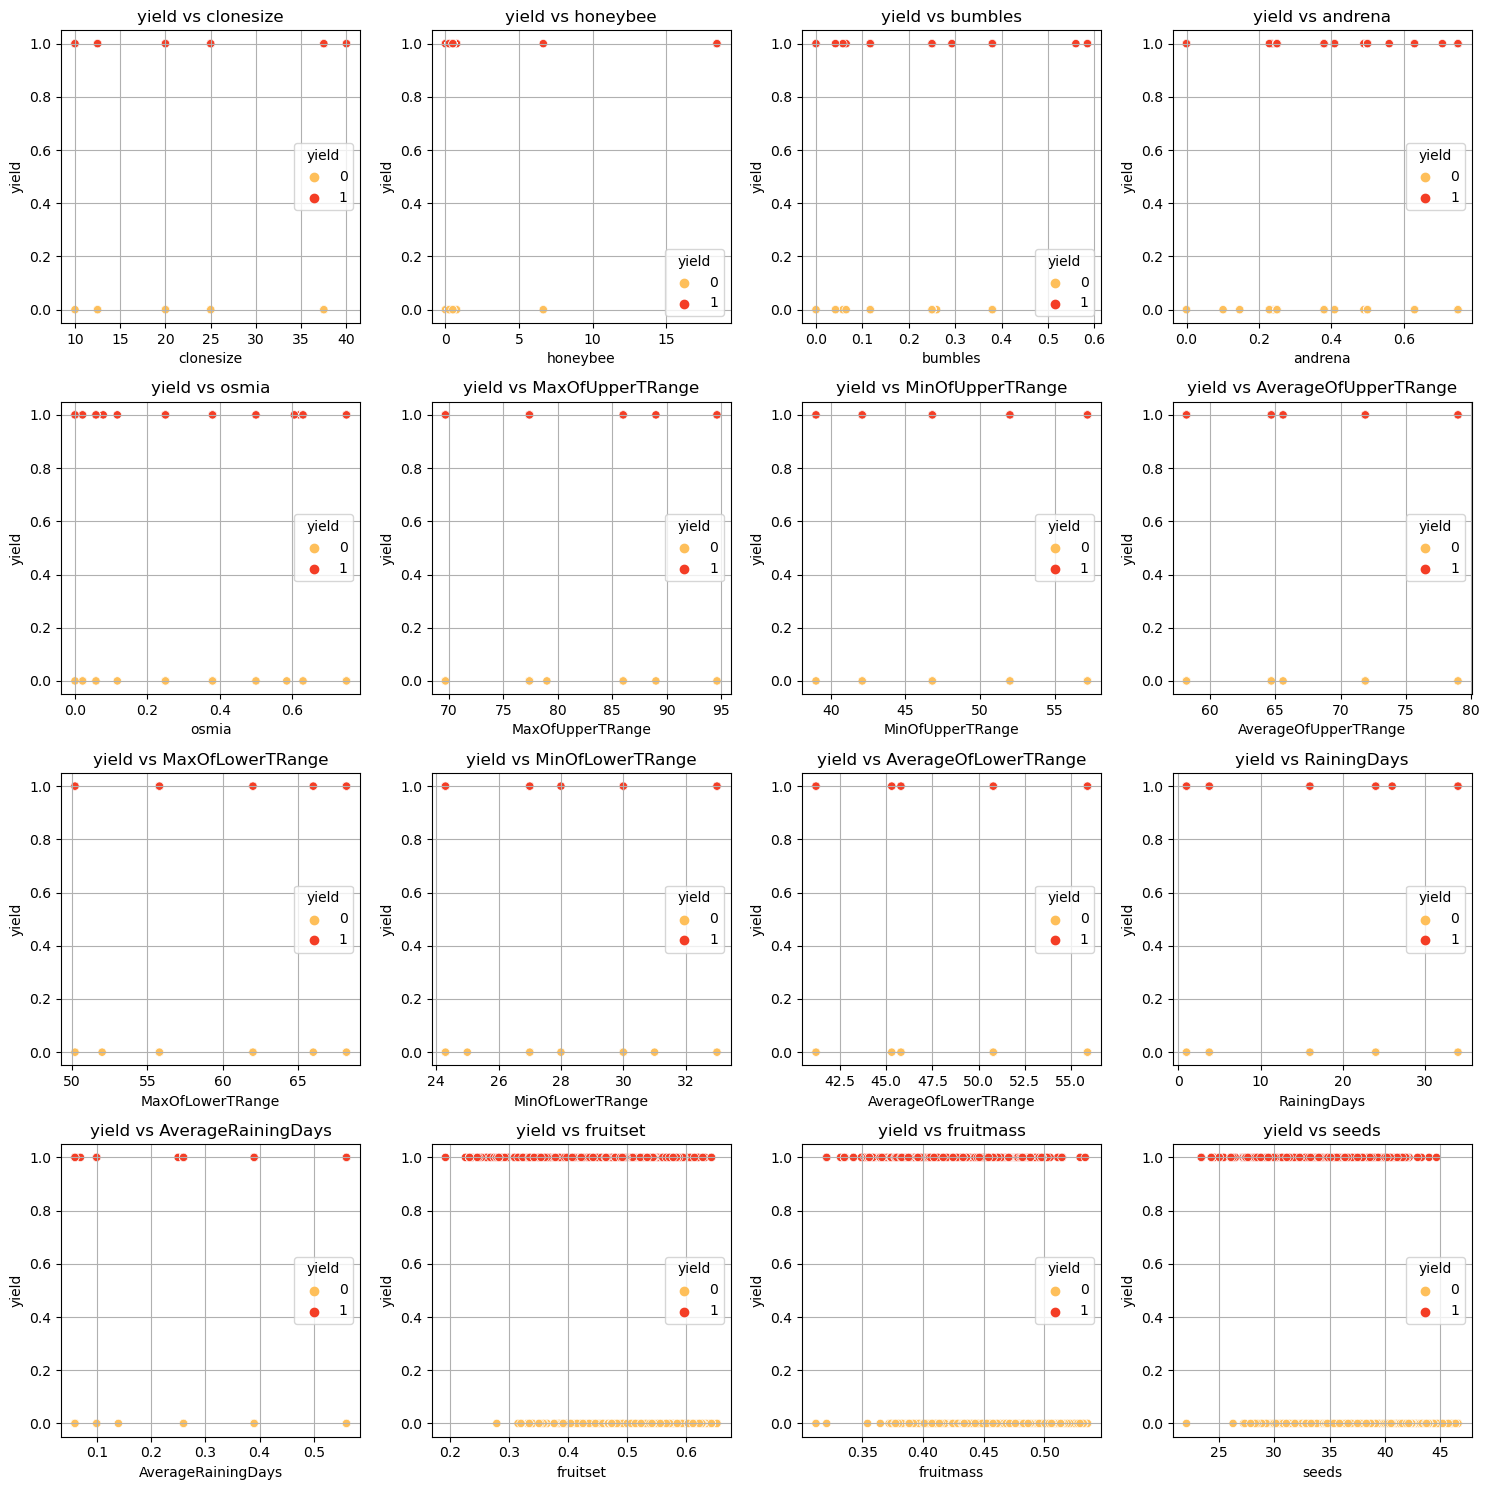

In [31]:
scatter_plots_yield_vs_features(df_train_cat, target_col='yield')

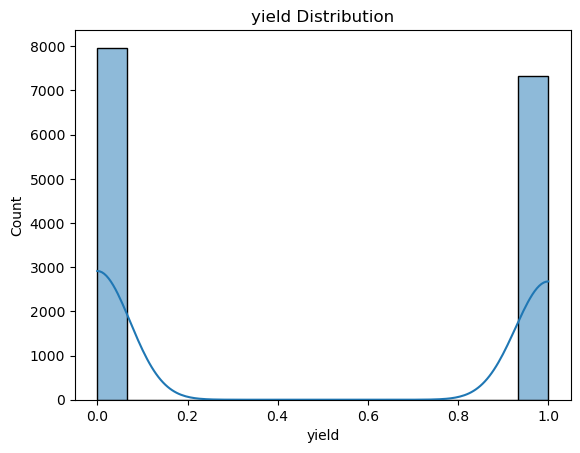

In [32]:
target_col_cat = 'yield'
sns.histplot(df_train_cat[target_col_cat], kde=True)
plt.title(f'{target_col_cat} Distribution')
plt.show()

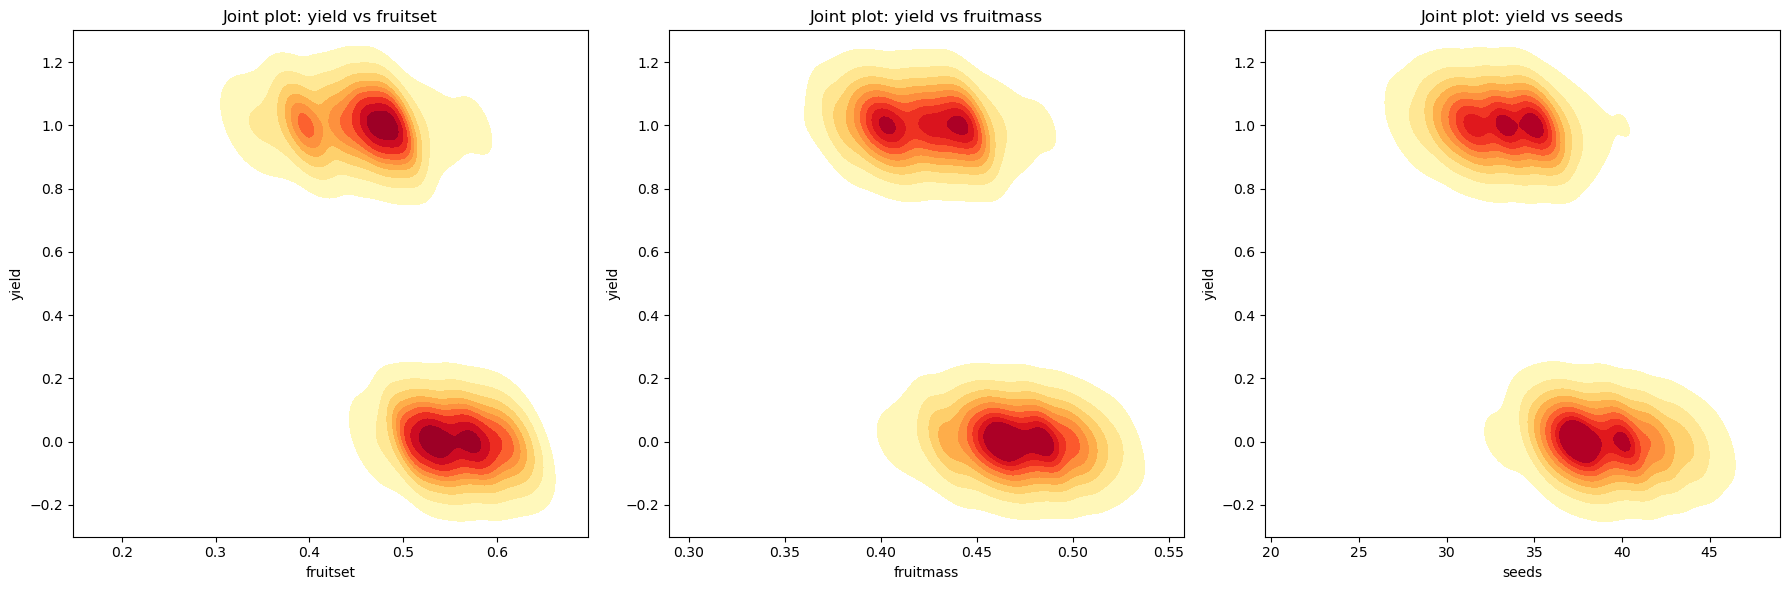

In [33]:
columnas_cat = df_train_cat.iloc[:, -4:-1].columns
plot_jointplot(df_train_cat, 'yield', columnas_cat)


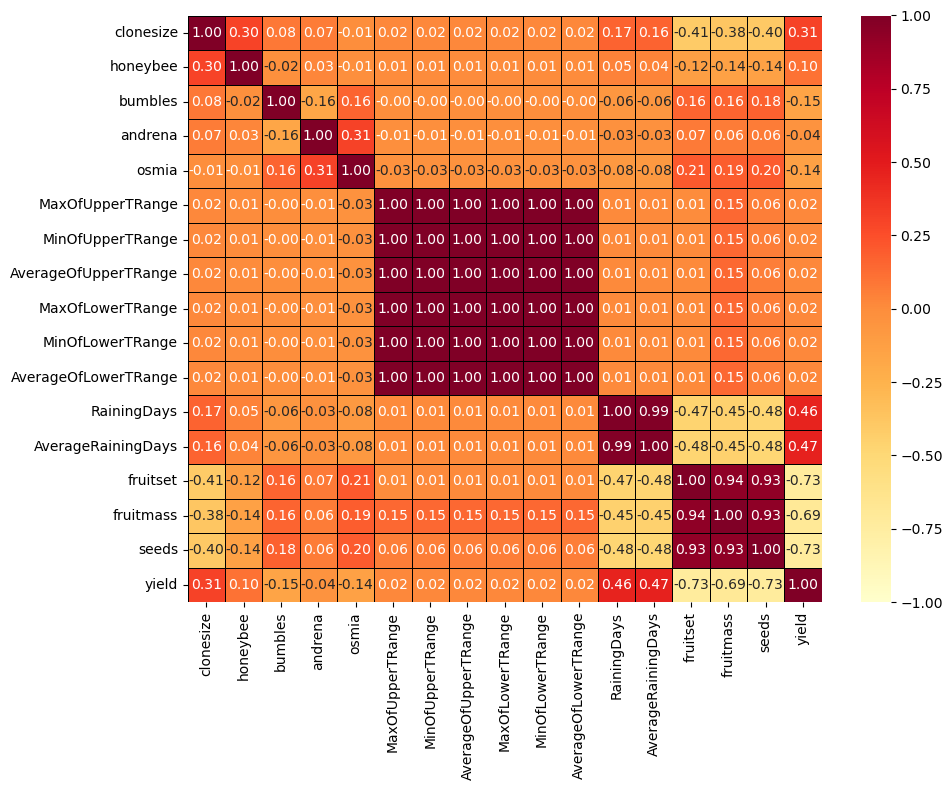

In [34]:
def graficar_correlaciones_cat(df1):
    corr1 = df1.corr()
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))
    sns.heatmap(corr1, annot=True, cmap='YlOrRd', vmin=-1, vmax=1, ax=ax1, fmt='.2f', linewidths=0.5, linecolor="black")
    plt.tight_layout()
    plt.show()
    
graficar_correlaciones_cat(df_train_cat)

### Logistic Regression

In [35]:
df_train_std_cat, df_train_norm_cat, scaler_std_train_cat, scaler_norm_train_cat = standardize_and_normalize(df_train_cat)
df_train_std_cat['yield'] = df_train_std_cat['yield'] * scaler_std_train_cat.scale_[-1] + scaler_std_train_cat.mean_[-1]

X_cat = df_train_std_cat.drop('yield', axis=1)
y_cat = df_train_std_cat['yield']

print('Shape of X: {}'.format(X_cat.shape))
print('Shape of y: {}'.format(y_cat.shape))
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y_cat, test_size=0.2, random_state=957)
print("Instancias X_train (category) dataset: ", X_train_cat.shape)
print("Instancias y_train (category) dataset: ", y_train_cat.shape)
print("Instancias X_test (category) dataset: ", X_test_cat.shape)
print("Instancias y_test (category) dataset: ", y_test_cat.shape,'\n')


Shape of X: (15289, 16)
Shape of y: (15289,)
Instancias X_train (category) dataset:  (12231, 16)
Instancias y_train (category) dataset:  (12231,)
Instancias X_test (category) dataset:  (3058, 16)
Instancias y_test (category) dataset:  (3058,) 



In [36]:
print("y_train_cat unique values:", np.unique(y_train_cat))
print("y_test_cat unique values:", np.unique(y_test_cat))

y_train_cat unique values: [0. 1.]
y_test_cat unique values: [0. 1.]


In [37]:
print(y_cat.value_counts())
y_train_cat.head(5)

0.0    7968
1.0    7321
Name: yield, dtype: int64


2759    0.0
4637    1.0
2286    1.0
7972    0.0
4641    0.0
Name: yield, dtype: float64

In [38]:
def logistic_regression(X_train, y_train, X_test, y_test):
    logistic_regression_1 = LogisticRegression(solver='liblinear', random_state=957)
    logistic_regression_1.fit(X_train, y_train)
    y_pred = logistic_regression_1.predict(X_test)

    print("Metricas de evaluacion en el conjunto de prueba:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1: {f1_score(y_test, y_pred):.2f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Precision:",accuracy_score(y_test, y_pred)*100,"%")
    
    return logistic_regression_1

logistic_regression_1 = logistic_regression(X_train_cat, y_train_cat, X_test_cat, y_test_cat)

Métricas de evaluación en el conjunto de prueba:
Accuracy: 0.90
Precision: 0.90
Recall: 0.89
F1: 0.89
[[1466  143]
 [ 165 1284]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      1609
         1.0       0.90      0.89      0.89      1449

    accuracy                           0.90      3058
   macro avg       0.90      0.90      0.90      3058
weighted avg       0.90      0.90      0.90      3058

Precision: 89.92805755395683 %


In [39]:
def logistic_regression_kfold(X_train, y_train, X_test, y_test, n_splits=10):
    logistic_regression_2 = LogisticRegression(solver='liblinear', random_state=957)
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv_results_lr = cross_validate(logistic_regression_2, X_train, y_train, cv=n_splits, scoring=scoring)
    logistic_regression_2.fit(X_train, y_train)
    y_pred = logistic_regression_2.predict(X_test)

    print("Metricas de evaluacion en el conjunto de prueba:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1: {f1_score(y_test, y_pred):.2f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Precision:",accuracy_score(y_test, y_pred)*100,"%")

    print("\nMetricas promedio durante la validacion cruzada K-fold:")
    for metric in scoring:
        mean_score = cv_results_lr[f"test_{metric}"].mean()
        print(f"{metric.capitalize()}: {mean_score:.2f}")
        
    return logistic_regression_2

logistic_regression_2 = logistic_regression_kfold(X_train_cat, y_train_cat, X_test_cat, y_test_cat)


Métricas de evaluación en el conjunto de prueba:
Accuracy: 0.90
Precision: 0.90
Recall: 0.89
F1: 0.89
[[1466  143]
 [ 165 1284]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      1609
         1.0       0.90      0.89      0.89      1449

    accuracy                           0.90      3058
   macro avg       0.90      0.90      0.90      3058
weighted avg       0.90      0.90      0.90      3058

Precision: 89.92805755395683 %

Métricas promedio durante la validación cruzada K-fold:
Accuracy: 0.91
Precision: 0.91
Recall: 0.90
F1: 0.90


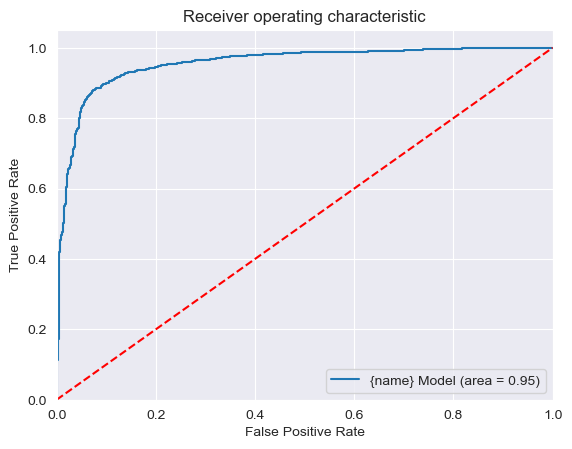

In [40]:
def plot_roc_auc(model, X_train, y_train, X_test, y_test):
    
    sns.set_style("darkgrid")
    tmp = model.fit(X_train, y_train.ravel())
    ##y_pred_sample_score = tmp.decision_function(X_test)
    if hasattr(tmp, "decision_function"):
        y_pred_sample_score = tmp.decision_function(X_test)
    else:
        y_pred_sample_score = tmp.predict_proba(X_test)[:, 1]
    logit_roc_auc = roc_auc_score(y_test, y_pred_sample_score)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
    plt.figure()
    plt.plot(fpr, tpr, label='{name} Model (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
plot_roc_auc(logistic_regression_1, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

### BernoulliNB, GaussianNB

In [41]:
def naive_bayes_classification_cv(X_train, y_train, X_test, y_test, cv=10):
    
    bernoulli_nb = BernoulliNB()
    bernoulli_nb.fit(X_train, y_train)
    
    gaussian_nb = GaussianNB()
    gaussian_nb.fit(X_train, y_train)
 
    for model_name, model in [('BernoulliNB', bernoulli_nb), ('GaussianNB', gaussian_nb)]:

        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

        print(f"{model_name}:")
        print(f"  Cross-validation Scores: {scores}")
        print(f"  Mean Accuracy: {scores.mean():.2f}")
        print(f"  Standard Deviation: {scores.std():.2f}\n")
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"  Test Accuracy: {accuracy:.2f}")
        print(f"  Test Precision: {precision:.2f}")
        print(f"  Test Recall: {recall:.2f}")
        print(f"  Test F1 Score: {f1:.2f}\n")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Precision:",accuracy_score(y_test, y_pred)*100,"%\n")

    return bernoulli_nb, gaussian_nb

bernoulli_NB, gaussian_NB = naive_bayes_classification_cv(X_train_cat, y_train_cat, X_test_cat, y_test_cat)

BernoulliNB:
  Cross-validation Scores: [0.89379085 0.88716271 0.88470973 0.9002453  0.90923957 0.91741619
 0.91578087 0.90106296 0.89452167 0.90351594]
  Mean Accuracy: 0.90
  Standard Deviation: 0.01

  Test Accuracy: 0.90
  Test Precision: 0.88
  Test Recall: 0.90
  Test F1 Score: 0.89

[[1434  175]
 [ 138 1311]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1609
         1.0       0.88      0.90      0.89      1449

    accuracy                           0.90      3058
   macro avg       0.90      0.90      0.90      3058
weighted avg       0.90      0.90      0.90      3058

Precision: 89.76455199476783 %

GaussianNB:
  Cross-validation Scores: [0.86601307 0.87653312 0.87653312 0.89697465 0.90269828 0.8896157
 0.88634505 0.88062142 0.88470973 0.87326247]
  Mean Accuracy: 0.88
  Standard Deviation: 0.01

  Test Accuracy: 0.88
  Test Precision: 0.89
  Test Recall: 0.85
  Test F1 Score: 0.87

[[1461  148]
 [ 212 1237]]
       

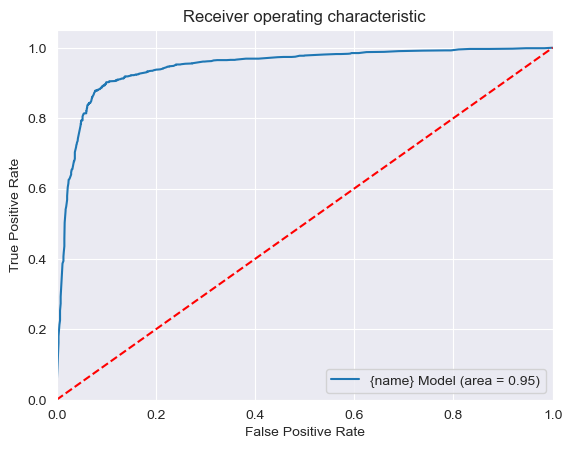

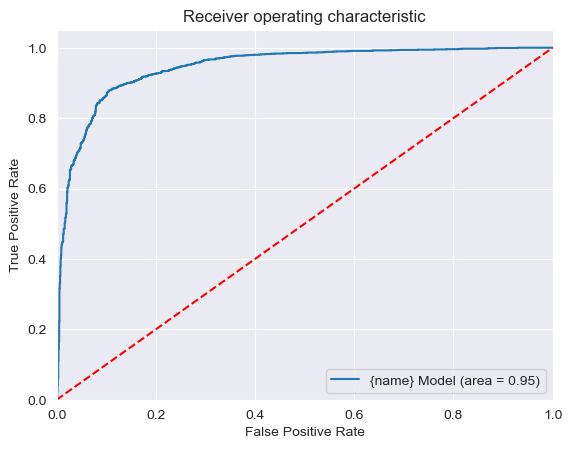

In [42]:
plot_roc_auc(bernoulli_NB, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
plot_roc_auc(gaussian_NB, X_train_cat, y_train_cat, X_test_cat, y_test_cat)

### MultinomialNB

In [43]:
X_cat_norm = df_train_norm_cat.drop('yield', axis=1)
y_cat_norm = df_train_norm_cat['yield']
print('Shape of X: {}'.format(X_cat_norm.shape))
print('Shape of y: {}'.format(y_cat_norm.shape))
X_train_cat_norm, X_test_cat_norm, y_train_cat_norm, y_test_cat_norm = train_test_split(X_cat_norm, y_cat_norm, test_size=0.2, random_state=957)
print("Instancias X_train (category) dataset: ", X_train_cat_norm.shape)
print("Instancias y_train (category) dataset: ", y_train_cat_norm.shape)
print("Instancias X_test (category) dataset: ", X_test_cat_norm.shape)
print("Instancias y_test (category) dataset: ", y_test_cat_norm.shape,'\n')
df_train_norm_cat.head(5)

Shape of X: (15289, 16)
Shape of y: (15289,)
Instancias X_train (category) dataset:  (12231, 16)
Instancias y_train (category) dataset:  (12231,)
Instancias X_test (category) dataset:  (3058, 16)
Instancias y_test (category) dataset:  (3058,) 



,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0.500000,0.027130,0.42735,1.000000,0.666667,0.000000,0.170330,0.000000,0.000000,0.000000,0.000000,0.69697,0.66,0.505601,0.472087,0.423640,1.0
1,0.500000,0.027130,0.42735,0.666667,0.666667,0.000000,0.170330,0.000000,0.000000,0.000000,0.000000,0.69697,0.66,0.548911,0.492226,0.480664,1.0
2,0.083333,0.013565,0.42735,0.840000,0.840000,0.654618,0.714286,0.658654,0.655556,0.655172,0.653061,0.69697,0.66,0.784034,0.710344,0.663619,0.0
3,0.083333,0.013565,0.42735,0.840000,0.666667,0.309237,0.428571,0.312500,0.311111,0.310345,0.312925,0.69697,0.66,0.812440,0.742898,0.709558,0.0
4,0.500000,0.027130,0.42735,0.840000,0.840000,0.309237,0.428571,0.312500,0.311111,0.310345,0.312925,0.69697,0.66,0.842261,0.814536,0.751056,0.0


In [44]:
def multinomial_naive_bayes_classification_cv(X_train, y_train, X_test, y_test, cv=10):
    
    multinomial_nb = MultinomialNB()
    multinomial_nb.fit(X_train, y_train)
    
 
    for model_name, model in [('BernoulliNB', multinomial_nb)]:

        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

        print(f"{model_name}:")
        print(f"  Cross-validation Scores: {scores}")
        print(f"  Mean Accuracy: {scores.mean():.2f}")
        print(f"  Standard Deviation: {scores.std():.2f}\n")
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"  Test Accuracy: {accuracy:.2f}")
        print(f"  Test Precision: {precision:.2f}")
        print(f"  Test Recall: {recall:.2f}")
        print(f"  Test F1 Score: {f1:.2f}\n")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Precision:",accuracy_score(y_test, y_pred)*100,"%\n")

    return multinomial_nb

multinomial_NB = multinomial_naive_bayes_classification_cv(X_train_cat_norm, y_train_cat_norm, X_test_cat_norm, y_test_cat_norm)

BernoulliNB:
  Cross-validation Scores: [0.78186275 0.79558463 0.78740801 0.79231398 0.81030253 0.80294358
 0.79476697 0.7939493  0.79640229 0.79476697]
  Mean Accuracy: 0.80
  Standard Deviation: 0.01

  Test Accuracy: 0.80
  Test Precision: 0.81
  Test Recall: 0.75
  Test F1 Score: 0.78

[[1354  255]
 [ 360 1089]]
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81      1609
         1.0       0.81      0.75      0.78      1449

    accuracy                           0.80      3058
   macro avg       0.80      0.80      0.80      3058
weighted avg       0.80      0.80      0.80      3058

Precision: 79.88881621975146 %



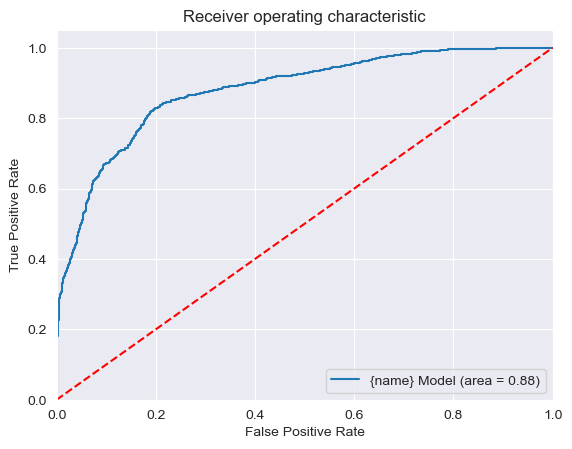

In [45]:
plot_roc_auc(multinomial_NB, X_train_cat_norm, y_train_cat_norm, X_test_cat_norm, y_test_cat_norm)

### LDA & QDA

In [48]:
def lda_qda_classification(X_train, y_train, X_test, y_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)

    models = {"LDA": lda, "QDA": qda}
    metrics = ["accuracy", "precision", "recall", "f1"]

    for name, model in models.items():
        y_pred = model.predict(X_test)

        print(f"Model: {name}")
        print("Metricas de evaluacion en el conjunto de prueba:")

        acc = accuracy_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        print("Precision:",accuracy_score(y_test, y_pred)*100,"%\n")

        for metric, score in zip(metrics, [acc, pre, rec, f1]):
            print(f"{metric.capitalize()}: {score:.2f}")

        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("\n")
    
    return lda, qda

lda_model, qda_model = lda_qda_classification(X_train_cat, y_train_cat, X_test_cat, y_test_cat)

Model: LDA
Métricas de evaluación en el conjunto de prueba:
Precision: 89.73185088293002 %

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1: 0.90
[[1481  128]
 [ 186 1263]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      1609
         1.0       0.91      0.87      0.89      1449

    accuracy                           0.90      3058
   macro avg       0.90      0.90      0.90      3058
weighted avg       0.90      0.90      0.90      3058



Model: QDA
Métricas de evaluación en el conjunto de prueba:
Precision: 80.83714846304775 %

Accuracy: 0.81
Precision: 0.84
Recall: 0.81
F1: 0.80
[[1541   68]
 [ 518  931]]
              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84      1609
         1.0       0.93      0.64      0.76      1449

    accuracy                           0.81      3058
   macro avg       0.84      0.80      0.80      3058
weighted avg       0.84      0.81      0.80      3058



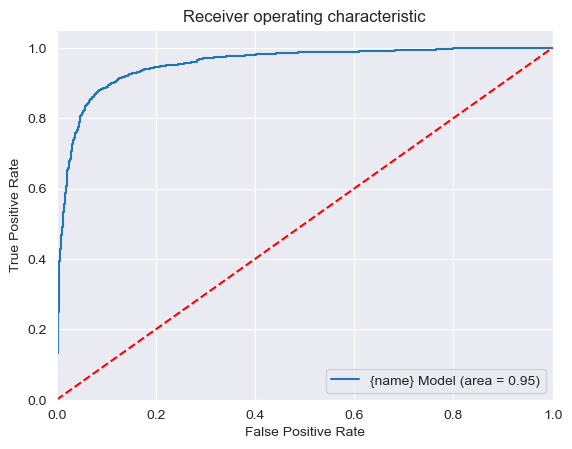

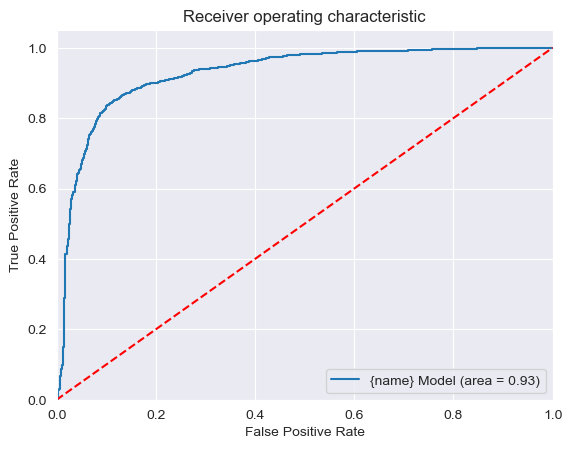

In [49]:
plot_roc_auc(lda_model, X_train_cat_norm, y_train_cat_norm, X_test_cat_norm, y_test_cat_norm)
plot_roc_auc(qda_model, X_train_cat_norm, y_train_cat_norm, X_test_cat_norm, y_test_cat_norm)